In [36]:
# import
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as  np

In [37]:
# set a start and a end date
start=pd.to_datetime('2012-01-01')
end=pd.to_datetime('2017-01-01')

In [60]:
# set the actions code
tickers=['AAPl','CSCO','IBM','AMZN']
stocks=pd.DataFrame() # generate an empty data frame
for t in tickers:
    stocks[t]=wb.DataReader(t,data_source='yahoo',start=start,end=end)['Adj Close'] # save the adj close price

In [41]:
# generate daily logaritmic price
log_ret=np.log(stocks/stocks.shift(1))

In [42]:
def get_ret_vol_sr(weights):
    weights=np.array(weights)
    ret=np.sum(log_ret.mean()*weights)*250
    vol=np.sqrt(np.dot(weights.T,np.dot(log_ret.cov()*250,weights)))
    sc=ret/vol
    return np.array([ret,vol,sc])
from  scipy.optimize import minimize


In [43]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2]*-1#return -sharpe ratio because will you the minimize method

In [54]:
def check_sum(weights):
    return np.sum(weights)-1

In [55]:
const=({'type':'eq','fun':check_sum})

In [56]:
# set the limits for weights. Is between 0 and 1
bounds=((0,1),(0,1),(0,1),(0,1))

In [57]:
# set inital guess of weights
init_guess=[0.25,0.25,0.25,0.25]

In [58]:
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [59]:
frontier_y=np.linspace(0,0.27,100)
frontier_volatility=[]
for possible_returns in frontier_y:
    cons=({'type':'eq','fun':check_sum},
          {'type':'eq','fun':lambda w: get_ret_vol_sr(w)[0]-possible_returns})
    result=minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    frontier_volatility.append(result['fun'])

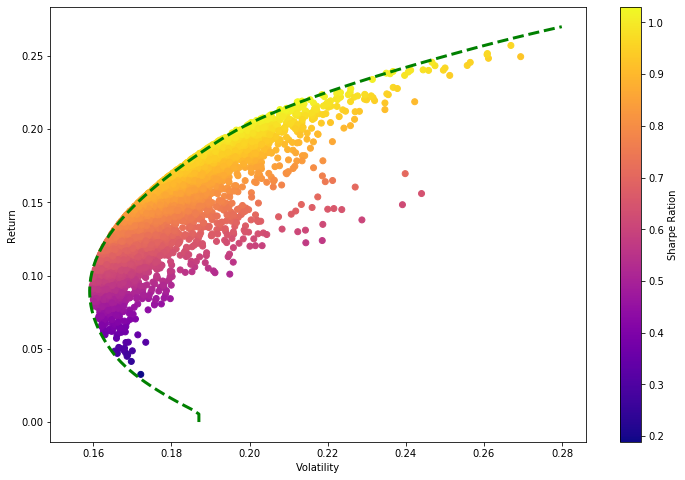

In [53]:
#plot the result
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ration')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)